In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.utils import plot_model
from tensorflow.keras.callbacks import TensorBoard





2023-04-12 05:16:45.745917: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-12 05:16:46.164831: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-12 05:16:46.165597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 05:16:49.392751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [25]:
print(tf.__version__)

2.12.0


In [3]:
# Define the TensorBoard callback
log_dir = "/workspaces/CMPE258/logs/fit"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the training set into a training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Define the number of folds for cross-validation
k = 5

# Create the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

Fold 1
Epoch 1/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.4242 - accuracy: 0.9475 - val_loss: 0.3285 - val_accuracy: 0.9743
Epoch 2/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3947 - accuracy: 0.9513 - val_loss: 0.3126 - val_accuracy: 0.9760
Epoch 3/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3821 - accuracy: 0.9528 - val_loss: 0.3141 - val_accuracy: 0.9724
Epoch 4/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3798 - accuracy: 0.9520 - val_loss: 0.3166 - val_accuracy: 0.9712
Epoch 5/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3682 - accuracy: 0.9529 - val_loss: 0.2958 - val_accuracy: 0.9746
Test loss: 0.2940042316913605
Test accuracy: 0.9746999740600586


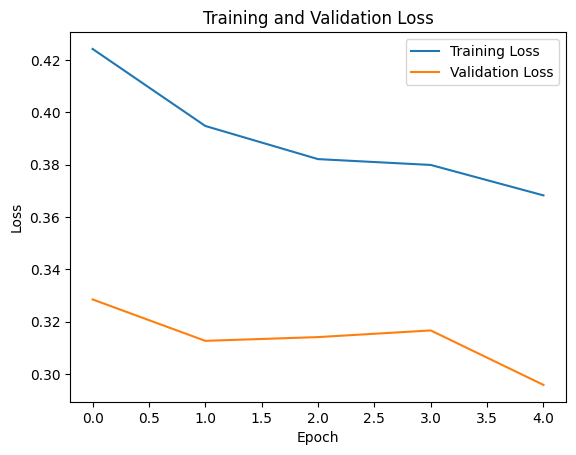

Fold 2
Epoch 1/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3622 - accuracy: 0.9543 - val_loss: 0.2954 - val_accuracy: 0.9733
Epoch 2/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3614 - accuracy: 0.9530 - val_loss: 0.3036 - val_accuracy: 0.9724
Epoch 3/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3562 - accuracy: 0.9553 - val_loss: 0.3098 - val_accuracy: 0.9664
Epoch 4/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3571 - accuracy: 0.9549 - val_loss: 0.3019 - val_accuracy: 0.9698
Epoch 5/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3559 - accuracy: 0.9553 - val_loss: 0.2918 - val_accuracy: 0.9722
Test loss: 0.287812739610672
Test accuracy: 0.9761999845504761


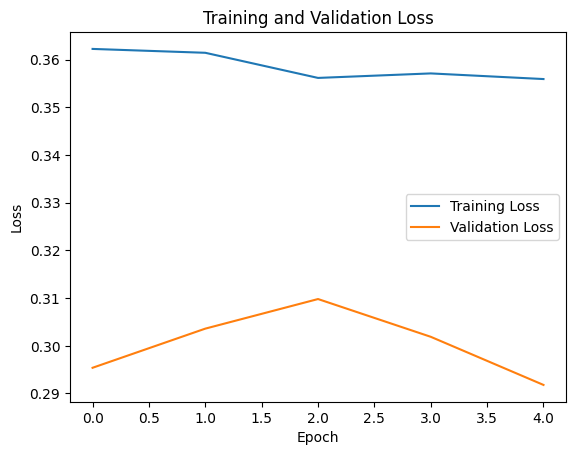

Fold 3
Epoch 1/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3510 - accuracy: 0.9552 - val_loss: 0.2931 - val_accuracy: 0.9730
Epoch 2/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3528 - accuracy: 0.9546 - val_loss: 0.3025 - val_accuracy: 0.9719
Epoch 3/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3513 - accuracy: 0.9557 - val_loss: 0.2843 - val_accuracy: 0.9749
Epoch 4/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3486 - accuracy: 0.9566 - val_loss: 0.2881 - val_accuracy: 0.9740
Epoch 5/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3476 - accuracy: 0.9574 - val_loss: 0.2900 - val_accuracy: 0.9723
Test loss: 0.2861182391643524
Test accuracy: 0.9753000140190125


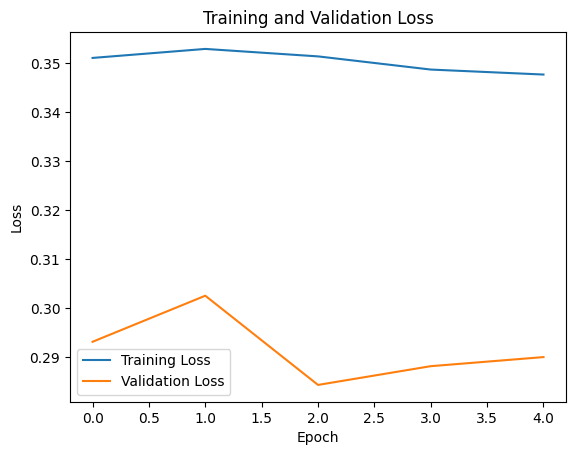

Fold 4
Epoch 1/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3445 - accuracy: 0.9566 - val_loss: 0.2868 - val_accuracy: 0.9729
Epoch 2/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3464 - accuracy: 0.9549 - val_loss: 0.2847 - val_accuracy: 0.9728
Epoch 3/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3463 - accuracy: 0.9563 - val_loss: 0.2793 - val_accuracy: 0.9753
Epoch 4/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3456 - accuracy: 0.9573 - val_loss: 0.2888 - val_accuracy: 0.9739
Epoch 5/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3455 - accuracy: 0.9570 - val_loss: 0.2904 - val_accuracy: 0.9720
Test loss: 0.2872222065925598
Test accuracy: 0.9746999740600586


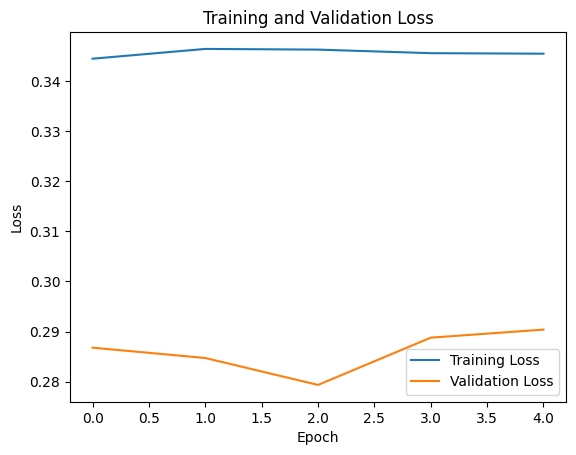

Fold 5
Epoch 1/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3414 - accuracy: 0.9573 - val_loss: 0.2943 - val_accuracy: 0.9717
Epoch 2/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3380 - accuracy: 0.9573 - val_loss: 0.3053 - val_accuracy: 0.9706
Epoch 3/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3355 - accuracy: 0.9581 - val_loss: 0.2938 - val_accuracy: 0.9726
Epoch 4/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3389 - accuracy: 0.9570 - val_loss: 0.2977 - val_accuracy: 0.9693
Epoch 5/5
1200/1200 [==============================] - 16s 13ms/step - loss: 0.3360 - accuracy: 0.9586 - val_loss: 0.2952 - val_accuracy: 0.9712
Test loss: 0.28096282482147217
Test accuracy: 0.9753999710083008


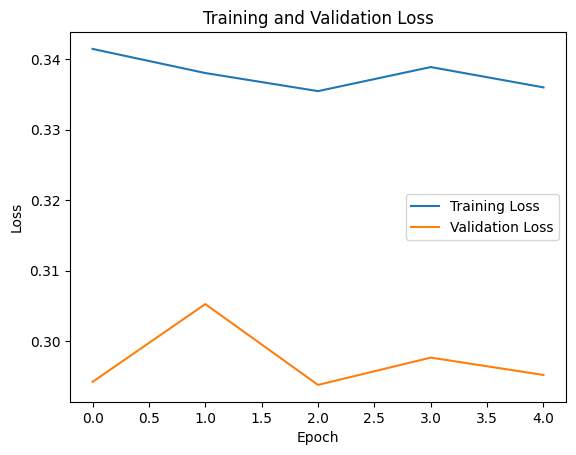

In [24]:
# Train the model using k-fold cross-validation
fold = 0
for train_index, val_index in kf.split(x_train):
    fold += 1
    print(f"Fold {fold}")
    x_train_fold = x_train[train_index]
    y_train_fold = y_train[train_index]
    x_val_fold = x_train[val_index]
    y_val_fold = y_train[val_index]
    
    # Fit the model to the current fold
    history = model.fit(x_train_fold, y_train_fold, validation_data=(x_val_fold, y_val_fold), epochs=5, batch_size=32, verbose=1)

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test loss: {test_loss}")
    print(f"Test accuracy: {test_acc}")
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [5]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
# Step 3: Train the model on regular data
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_regular = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])


2023-04-12 05:17:56.759889: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 1.7341 - accuracy: 0.8398

2023-04-12 05:18:14.446718: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


375/375 [==============================] - 19s 45ms/step - loss: 1.7341 - accuracy: 0.8398 - val_loss: 0.6792 - val_accuracy: 0.9396
Epoch 2/10
  3/375 [..............................] - ETA: 14s - loss: 0.7337 - accuracy: 0.9193

2023-04-12 05:18:15.947328: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49152000 exceeds 10% of free system memory.


375/375 [==============================] - 16s 42ms/step - loss: 0.6131 - accuracy: 0.9291 - val_loss: 0.4603 - val_accuracy: 0.9589
Epoch 3/10
  3/375 [..............................] - ETA: 13s - loss: 0.5802 - accuracy: 0.9193

2023-04-12 05:18:31.621987: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49152000 exceeds 10% of free system memory.


375/375 [==============================] - 16s 42ms/step - loss: 0.5019 - accuracy: 0.9399 - val_loss: 0.4112 - val_accuracy: 0.9642
Epoch 4/10
  3/375 [..............................] - ETA: 13s - loss: 0.4548 - accuracy: 0.9557

2023-04-12 05:18:47.414464: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49152000 exceeds 10% of free system memory.


375/375 [==============================] - 16s 42ms/step - loss: 0.4697 - accuracy: 0.9449 - val_loss: 0.3917 - val_accuracy: 0.9665
Epoch 5/10
375/375 [==============================] - 16s 42ms/step - loss: 0.4475 - accuracy: 0.9471 - val_loss: 0.3767 - val_accuracy: 0.9693
Epoch 6/10
375/375 [==============================] - 16s 42ms/step - loss: 0.4275 - accuracy: 0.9503 - val_loss: 0.3633 - val_accuracy: 0.9686
Epoch 7/10
375/375 [==============================] - 16s 42ms/step - loss: 0.4162 - accuracy: 0.9517 - val_loss: 0.3620 - val_accuracy: 0.9696
Epoch 8/10
375/375 [==============================] - 16s 43ms/step - loss: 0.4026 - accuracy: 0.9534 - val_loss: 0.3575 - val_accuracy: 0.9707
Epoch 9/10
375/375 [==============================] - 16s 42ms/step - loss: 0.3942 - accuracy: 0.9541 - val_loss: 0.3233 - val_accuracy: 0.9737
Epoch 10/10
375/375 [==============================] - 15s 41ms/step - loss: 0.3805 - accuracy: 0.9560 - val_loss: 0.3276 - val_accuracy: 0.9703


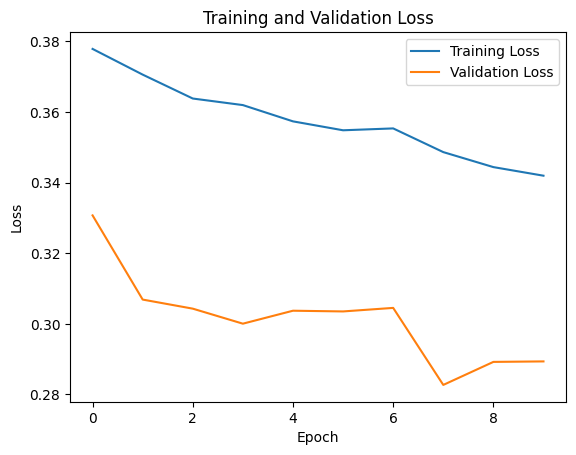

In [21]:
# Plot the training and validation loss curves
plt.plot(history_regular.history['loss'], label='Training Loss')
plt.plot(history_regular.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='reflect')

datagen.fit(x_train.reshape(-1, 28, 28, 1))

In [11]:
model_augmented = Sequential()
model_augmented.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(28, 28, 1)))
model_augmented.add(MaxPooling2D(pool_size=(2, 2)))
model_augmented.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_augmented.add(MaxPooling2D(pool_size=(2, 2)))
model_augmented.add(Flatten())
model_augmented.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_augmented.add(Dropout(0.5))
model_augmented.add(Dense(10, activation='softmax'))

In [16]:
model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_augmented = model_augmented.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 16s 40ms/step - loss: 0.3754 - accuracy: 0.9538 - val_loss: 0.3110 - val_accuracy: 0.9730
Epoch 2/10
375/375 [==============================] - 15s 39ms/step - loss: 0.3682 - accuracy: 0.9530 - val_loss: 0.3007 - val_accuracy: 0.9742
Epoch 3/10
375/375 [==============================] - 15s 40ms/step - loss: 0.3615 - accuracy: 0.9549 - val_loss: 0.3046 - val_accuracy: 0.9706
Epoch 4/10
375/375 [==============================] - 15s 39ms/step - loss: 0.3586 - accuracy: 0.9540 - val_loss: 0.2935 - val_accuracy: 0.9736
Epoch 5/10
375/375 [==============================] - 15s 39ms/step - loss: 0.3577 - accuracy: 0.9545 - val_loss: 0.3052 - val_accuracy: 0.9717
Epoch 6/10
375/375 [==============================] - 15s 40ms/step - loss: 0.3530 - accuracy: 0.9549 - val_loss: 0.2951 - val_accuracy: 0.9747
Epoch 7/10
375/375 [==============================] - 16s 41ms/step - loss: 0.3507 - accuracy: 0.9559 - val_loss: 0.2953 - val_accuracy:

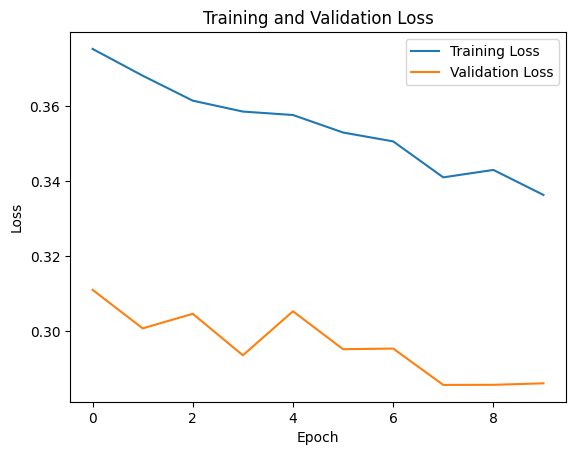

In [22]:
# Plot the training and validation loss curves
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Step 5: Compare the performance of the models on the validation set
score_regular = model.evaluate(x_val, y_val)
score_augmented = model_augmented.evaluate(x_val, y_val)

print("Regular model validation accuracy:", score_regular[1])
print("Augmented model validation accuracy:", score_augmented[1])

375/375 [==============================] - 1s 4ms/step - loss: 0.3144 - accuracy: 0.9728
Regular model validation accuracy: 0.9710000157356262
Augmented model validation accuracy: 0.9727500081062317
